# 1. Data Collection (Read the Data)  

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

%matplotlib inline

Data Source: World Bank

In [2]:
df = pd.read_csv('Exports of goods and services (constant 2015 US$).csv',
                 index_col=[0],
                 parse_dates=[0],
                 nrows=63
                 )
df.tail()

,Exports of goods and services (constant 2015 US$)
Year,
2018-01-01,9.358360e+10
2019-01-01,7.740455e+10
2020-01-01,6.747427e+10
2021-01-01,7.096753e+10
2022-01-01,7.611679e+10


In [3]:
# Checking missing values percentage

round(100*(df.isnull().sum())/len(df), 2)

Exports of goods and services (constant 2015 US$)    0.0
dtype: float64

In [4]:
print(type(df))

series_values = df.values
print(type(series_values))
print(df.size)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
63


In [5]:
# Check if the data has already indexed to time series or not.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1960-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Exports of goods and services (constant 2015 US$)  63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


# 2. Data Preprocessing (Normalization/Standardization)

## 2.1 Feature Engineering (lagged variables/rolling avg.)

In [6]:
df

,Exports of goods and services (constant 2015 US$)
Year,
1960-01-01,2.070970e+10
1961-01-01,2.321990e+10
1962-01-01,2.628075e+10
1963-01-01,2.894582e+10
1964-01-01,3.254012e+10
...,...
2018-01-01,9.358360e+10
2019-01-01,7.740455e+10
2020-01-01,6.747427e+10


### Feature Engineering

In [8]:
df['lag1'] = df['Exports of goods and services (constant 2015 US$)'].shift(1)
df['lag2'] = df['Exports of goods and services (constant 2015 US$)'].shift(2)
df['lag3'] = df['Exports of goods and services (constant 2015 US$)'].shift(3)

df['MA3'] = df['Exports of goods and services (constant 2015 US$)'].rolling(
    window=3).mean()
df['MA4'] = df['Exports of goods and services (constant 2015 US$)'].rolling(
    window=4).mean()
df['MA5'] = df['Exports of goods and services (constant 2015 US$)'].rolling(
    window=5).mean()
df['MAX5'] = df['Exports of goods and services (constant 2015 US$)'].rolling(
    window=5).max()
df['MIN5'] = df['Exports of goods and services (constant 2015 US$)'].rolling(
    window=5).min()


df.head()

,Exports of goods and services (constant 2015 US$),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1960-01-01,2.070970e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,2.321990e+10,2.070970e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,2.628075e+10,2.321990e+10,2.070970e+10,NaN,2.340345e+10,NaN,NaN,NaN,NaN
1963-01-01,2.894582e+10,2.628075e+10,2.321990e+10,2.070970e+10,2.614882e+10,2.478904e+10,NaN,NaN,NaN
1964-01-01,3.254012e+10,2.894582e+10,2.628075e+10,2.321990e+10,2.925556e+10,2.774665e+10,2.633926e+10,3.254012e+10,2.070970e+10


In [9]:
df = df.dropna()
df

,Exports of goods and services (constant 2015 US$),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1964-01-01,3.254012e+10,2.894582e+10,2.628075e+10,2.321990e+10,2.925556e+10,2.774665e+10,2.633926e+10,3.254012e+10,2.070970e+10
1965-01-01,3.787242e+10,3.254012e+10,2.894582e+10,2.628075e+10,3.311945e+10,3.140978e+10,2.977180e+10,3.787242e+10,2.321990e+10
1966-01-01,4.260243e+10,3.787242e+10,3.254012e+10,2.894582e+10,3.767166e+10,3.549020e+10,3.364831e+10,4.260243e+10,2.628075e+10
1967-01-01,4.951140e+10,4.260243e+10,3.787242e+10,3.254012e+10,4.332875e+10,4.063159e+10,3.829444e+10,4.951140e+10,2.894582e+10
1968-01-01,5.655588e+10,4.951140e+10,4.260243e+10,3.787242e+10,4.955657e+10,4.663553e+10,4.381645e+10,5.655588e+10,3.254012e+10
1969-01-01,6.691503e+10,5.655588e+10,4.951140e+10,4.260243e+10,5.766077e+10,5.389619e+10,5.069143e+10,6.691503e+10,3.787242e+10
1970-01-01,7.540928e+10,6.691503e+10,5.655588e+10,4.951140e+10,6.629340e+10,6.209790e+10,5.819881e+10,7.540928e+10,4.260243e+10
1971-01-01,8.838618e+10,7.540928e+10,6.691503e+10,5.655588e+10,7.690350e+10,7.181659e+10,6.735555e+10,8.838618e+10,4.951140e+10
1972-01-01,1.010856e+11,8.838618e+10,7.540928e+10,6.691503e+10,8.829369e+10,8.294902e+10,7.767039e+10,1.010856e+11,5.655588e+10


In feature eng., 4 years already has been deleted.

## 2.2 Normalization

For all features

In [10]:
df_arr = df.values
df_arr

array([[3.25401207e+10, 2.89458226e+10, 2.62807506e+10, 2.32198971e+10,
        2.92555646e+10, 2.77466478e+10, 2.63392574e+10, 3.25401207e+10,
        2.07096961e+10],
       [3.78724158e+10, 3.25401207e+10, 2.89458226e+10, 2.62807506e+10,
        3.31194530e+10, 3.14097774e+10, 2.97718014e+10, 3.78724158e+10,
        2.32198971e+10],
       [4.26024346e+10, 3.78724158e+10, 3.25401207e+10, 2.89458226e+10,
        3.76716570e+10, 3.54901984e+10, 3.36483089e+10, 4.26024346e+10,
        2.62807506e+10],
       [4.95114026e+10, 4.26024346e+10, 3.78724158e+10, 3.25401207e+10,
        4.33287510e+10, 4.06315934e+10, 3.82944393e+10, 4.95114026e+10,
        2.89458226e+10],
       [5.65558827e+10, 4.95114026e+10, 4.26024346e+10, 3.78724158e+10,
        4.95565733e+10, 4.66355339e+10, 4.38164513e+10, 5.65558827e+10,
        3.25401207e+10],
       [6.69150328e+10, 5.65558827e+10, 4.95114026e+10, 4.26024346e+10,
        5.76607727e+10, 5.38961882e+10, 5.06914337e+10, 6.69150328e+10,
        3.7

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [12]:
scaler = scaler.fit(df_arr)

In [13]:
print(scaler.data_max_)
print(scaler.data_min_)

[1.12683709e+11 1.12683709e+11 1.12683709e+11 1.12683709e+11
 1.08130352e+11 1.08183508e+11 1.06840954e+11 1.12683709e+11
 9.93142383e+10]
[1.74225951e+10 1.74225951e+10 1.74225951e+10 1.74225951e+10
 2.35375688e+10 2.77466478e+10 2.63392574e+10 3.25401207e+10
 1.74225951e+10]


In [14]:
df_normalize = scaler.transform(df_arr)

for i in range(5):
    print(df_normalize[i])

[0.15869566 0.12096465 0.09298816 0.06085696 0.06759437 0.
 0.         0.         0.04013964]
[0.21467123 0.15869566 0.12096465 0.09298816 0.11327071 0.04554044
 0.0426394  0.06653427 0.07079235]
[0.26432443 0.21467123 0.15869566 0.12096465 0.16708385 0.09626868
 0.09079376 0.12555357 0.10816922]
[0.33685107 0.26432443 0.21467123 0.15869566 0.23395828 0.16018708
 0.14850845 0.21176094 0.14071311]
[0.41080023 0.33685107 0.26432443 0.21467123 0.30757948 0.23482873
 0.21710342 0.29965918 0.18460401]


## 2.3 Standardization

In [15]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(df_arr)

In [16]:
print(std_scaler.mean_)
print(std_scaler.var_)

std_df = std_scaler.transform(df_arr)
print(std_df[0])
print(std_df[5])

[6.62269040e+10 6.54273961e+10 6.46699930e+10 6.39199189e+10
 6.54414310e+10 6.50610530e+10 6.46406402e+10 7.62002294e+10
 5.29298093e+10]
[5.11305003e+20 5.32565267e+20 5.57445281e+20 5.85869898e+20
 4.80439678e+20 4.62786644e+20 4.44652893e+20 5.00799786e+20
 4.73664735e+20]
[-1.48977102 -1.58083718 -1.62595462 -1.68148907 -1.65089534 -1.73454717
 -1.81636821 -1.95097967 -1.48044247]
[ 0.03043194 -0.3844247  -0.64203351 -0.88071493 -0.3549743  -0.51899486
 -0.66151385 -0.41491491 -0.69185371]


Note: Normalization and Standardization used in Model Training.

# 3. Exploratory Data Analysis

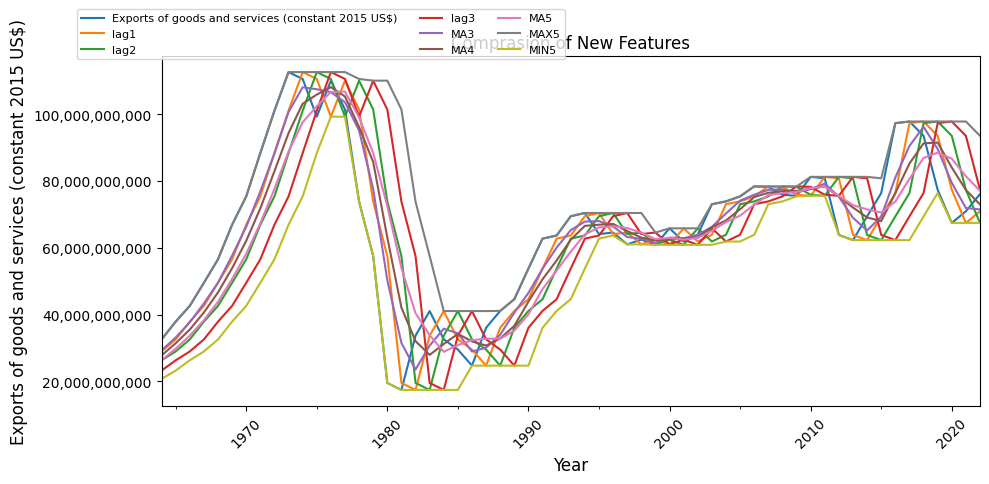

In [17]:
df.plot(style='-', figsize=(10, 5),
        title='Comprasion of New Features')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports of goods and services (constant 2015 US$)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

In [18]:
df = df.rename(columns={df.columns[0]: 'Actual'})

df_error1 = mean_squared_error(df.Actual, df.lag1)
df_error2 = mean_squared_error(df.Actual, df.lag2)
df_error3 = mean_squared_error(df.Actual, df.lag3)
df_error4 = mean_squared_error(df.Actual, df.MA3)
df_error5 = mean_squared_error(df.Actual, df.MA4)
df_error6 = mean_squared_error(df.Actual, df.MA5)
df_error7 = mean_squared_error(df.Actual, df.MAX5)
df_error8 = mean_squared_error(df.Actual, df.MIN5)

df_errors = {
    "Model": ["Lag 1", "Lag 2", "Lag 3", "MA 3", "MA 4", "MA 5", "MAX 5", "MIN 5"],
    "Mean Squared Error": [
        df_error1,
        df_error2,
        df_error3,
        df_error4,
        df_error5,
        df_error6,
        df_error7,
        df_error8
    ],
}

error_df = pd.DataFrame(df_errors)
sorted_error_df = error_df.sort_values(by='Mean Squared Error')
sorted_error_df.reset_index(drop=True, inplace=True)
print(sorted_error_df)

   Model  Mean Squared Error
0   MA 3        7.436002e+19
1  Lag 1        9.966655e+19
2   MA 4        1.336058e+20
3   MA 5        1.962835e+20
4  Lag 2        2.846223e+20
5  MIN 5        3.356244e+20
6  MAX 5        4.334514e+20
7  Lag 3        4.891217e+20


MA3 is most compatible with the first feature.

In [19]:
df = df.rename(columns={df.columns[0]: 'Actual'})
df.head()

,Actual,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1964-01-01,3.254012e+10,2.894582e+10,2.628075e+10,2.321990e+10,2.925556e+10,2.774665e+10,2.633926e+10,3.254012e+10,2.070970e+10
1965-01-01,3.787242e+10,3.254012e+10,2.894582e+10,2.628075e+10,3.311945e+10,3.140978e+10,2.977180e+10,3.787242e+10,2.321990e+10
1966-01-01,4.260243e+10,3.787242e+10,3.254012e+10,2.894582e+10,3.767166e+10,3.549020e+10,3.364831e+10,4.260243e+10,2.628075e+10
1967-01-01,4.951140e+10,4.260243e+10,3.787242e+10,3.254012e+10,4.332875e+10,4.063159e+10,3.829444e+10,4.951140e+10,2.894582e+10
1968-01-01,5.655588e+10,4.951140e+10,4.260243e+10,3.787242e+10,4.955657e+10,4.663553e+10,4.381645e+10,5.655588e+10,3.254012e+10


## 3.1 Adfuller test for Stationary

In [20]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(Actual):
    result = adfuller(Actual)
    labels = ['ADF Test Statistic', 'p-value',
              '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

In [21]:
adfuller_test(df['Actual'])

ADF Test Statistic : -2.9388346680956707
p-value : 0.04101485138568802
#Lags Used : 1
Number of Observations Used : 57
stationary


## 3.2 Statistical Analysis (ACF & PACF)

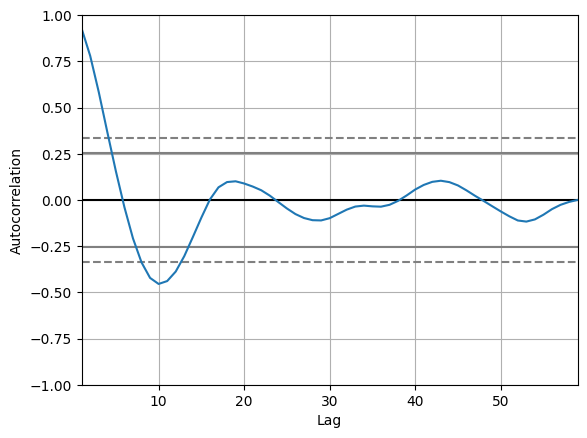

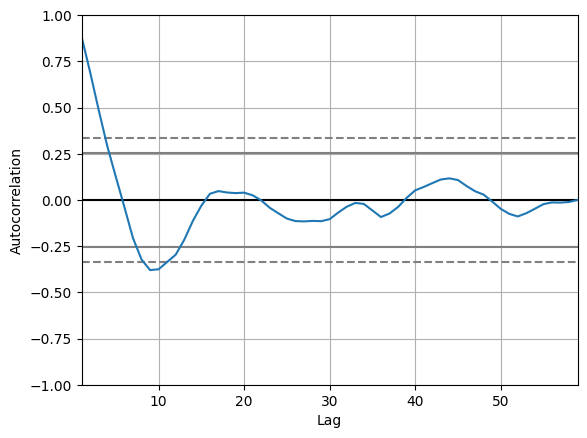

In [27]:
autocorrelation_plot(df['MA3'])
plt.show()

autocorrelation_plot(df['Actual'])
plt.show()

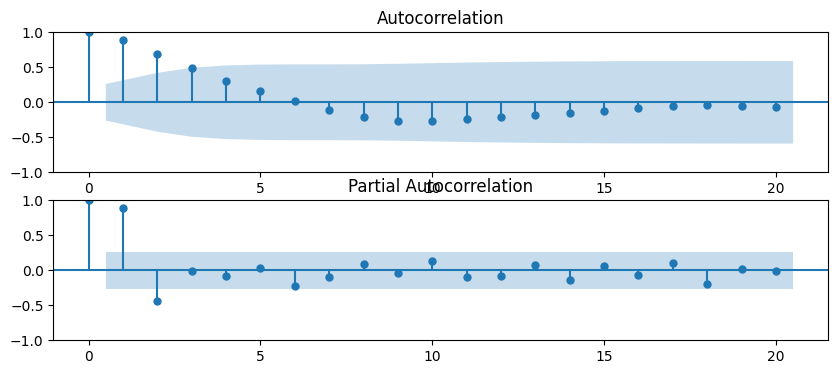

In [26]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df['Actual'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df['Actual'].iloc[3:], lags=20, ax=ax2)

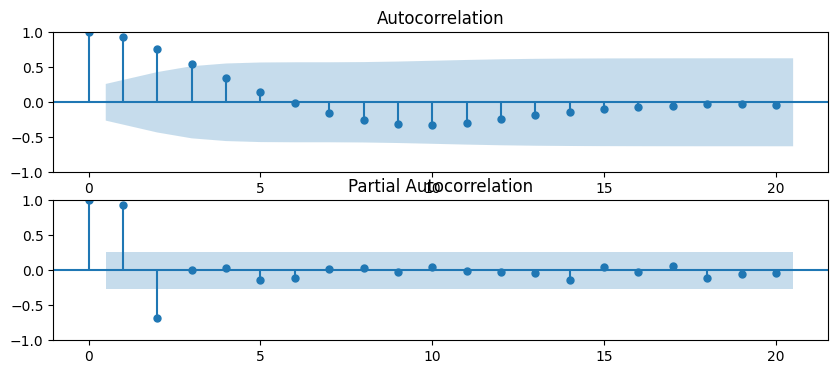

In [23]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df['MA3'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df['MA3'].iloc[3:], lags=20, ax=ax2)